In [1]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [12]:
df = pd.read_csv("C:\\Users\\CHARLES\\Desktop\\Data Science\\Hamoye One\\Data_for_UCI_named.csv")
print(df.columns)
df.head()


Index(['tau1', 'tau2', 'tau3', 'tau4', 'p1', 'p2', 'p3', 'p4', 'g1', 'g2',
       'g3', 'g4', 'stab', 'stabf'],
      dtype='object')


,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,0.055347,unstable
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,-0.005957,stable
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,0.003471,unstable
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,0.028871,unstable
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,0.049860,unstable


In [3]:
df[ 'stabf' ].value_counts()

unstable    6380
stable      3620
Name: stabf, dtype: int64

In [4]:
df = df.drop(['stab'], axis = 1) 
df.head()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,unstable
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,stable
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,unstable
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,unstable
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,unstable


In [5]:
X = df.drop(columns= 'stabf' )
y = df[ 'stabf' ] 

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size= 0.2 , random_state= 1 )
x_train.head()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4
2694,6.255995,2.542401,7.024714,9.476518,3.529888,-1.224881,-0.688228,-1.616780,0.568221,0.618403,0.685739,0.660088
5140,5.070581,5.490253,8.075688,0.761075,4.220888,-1.280596,-1.902185,-1.038107,0.443515,0.097244,0.916955,0.129254
2568,1.220072,8.804028,3.874283,8.433949,3.614027,-1.039236,-0.953566,-1.621224,0.908353,0.923594,0.238881,0.660156
3671,7.498402,6.697603,8.798626,2.126236,3.134585,-1.581906,-0.589386,-0.963293,0.260826,0.899003,0.964752,0.600598
7427,7.074006,1.337511,6.100756,7.759156,2.526922,-0.922540,-0.632600,-0.971782,0.984580,0.716082,0.836928,0.165162


In [6]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

X_train = scaler.fit_transform(x_train)
norm_X_train = pd.DataFrame(X_train, columns=x_train.columns)

X_test = scaler.transform (x_test)
norm_X_test = pd.DataFrame(X_test, columns=x_test.columns)

norm_X_train.head()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4
0,0.605895,0.214898,0.686826,0.945002,0.454782,0.516700,0.874552,0.255448,0.545528,0.598331,0.669360,0.642234
1,0.481097,0.525305,0.797470,0.027436,0.616162,0.479547,0.065178,0.641255,0.414248,0.049680,0.912824,0.083403
2,0.075724,0.874245,0.355155,0.835240,0.474432,0.640493,0.697645,0.252484,0.903588,0.919622,0.198830,0.642306
3,0.736693,0.652439,0.873580,0.171161,0.362461,0.278625,0.940452,0.691134,0.221930,0.893734,0.963154,0.579607
4,0.692014,0.088023,0.589553,0.764197,0.220544,0.718310,0.911640,0.685474,0.983833,0.701163,0.828559,0.121206


In [80]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf_forest=RandomForestClassifier(random_state=1)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf_forest.fit(norm_X_train, y_train)

y_pred_forest=clf_forest.predict(norm_X_test)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_forest))

Accuracy: 0.929


In [8]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(clf_forest, norm_X_train, y_train, cv= 5 , scoring= 'f1_macro' )
scores

array([0.90425476, 0.90854042, 0.91292754, 0.90441443, 0.92130561])

In [79]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.datasets import make_classification

# norm_X_train, y_train = make_classification(n_features=12, random_state=1)
clf_extratree = ExtraTreesClassifier(n_estimators= 1000, min_samples_split=2, min_samples_leaf=8, max_features= None, random_state=1)
clf_extratree.fit(norm_X_train, y_train)

y_pred_extratree = clf_extratree.predict(norm_X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_extratree))

Accuracy: 0.927


In [11]:
scores = cross_val_score(clf_extratree, norm_X_train, y_train, cv= 5 , scoring= 'f1_macro' )
scores

array([0.91104788, 0.90890596, 0.91695487, 0.91218763, 0.92433757])

In [81]:
from xgboost import XGBClassifier

clf_xgb = XGBClassifier(random_state=1)
clf_xgb.fit(norm_X_train, y_train)

print(clf_xgb)

# make predictions for test data
y_pred_xgb = clf_xgb.predict(norm_X_test)

# evaluate predictions
accuracy = metrics.accuracy_score(y_test, y_pred_xgb)
print("Accuracy: %.4f%%" % (accuracy *100))

XGBClassifier(random_state=1)
Accuracy: 91.9500%


In [14]:
scores = cross_val_score(clf_xgb, norm_X_train, y_train, cv= 5 , scoring= 'f1_macro' )
scores

array([0.89416221, 0.91816775, 0.91843641, 0.9083106 , 0.92672083])

In [83]:
import lightgbm as lgb

# build the lightgbm model
import lightgbm as lgb
clf_lgb = lgb.LGBMClassifier(random_state=1)
clf_lgb.fit(norm_X_train, y_train)

#Prediction
y_pred_lgb =clf_lgb.predict(norm_X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_lgb))

Accuracy: 0.9415


In [73]:
scores = cross_val_score(clf_lgb, norm_X_train, y_train, cv= 5 , scoring= 'f1_macro' )
scores

array([0.92979703, 0.94896117, 0.92973436, 0.93176111, 0.94093183])

In [84]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(clf_lgb.score(norm_X_train, y_train)))

print('Test set score: {:.4f}'.format(clf_lgb.score(norm_X_test, y_test)))

Training set score: 0.9989
Test set score: 0.9415


In [19]:
# view confusion-matrix
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_extratree)
print('Confusion matrix\n\n', cm)
print('\nTrue Positives(TP) = ', cm[0,0])
print('\nTrue Negatives(TN) = ', cm[1,1])
print('\nFalse Positives(FP) = ', cm[0,1])
print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[ 606  106]
 [  38 1250]]

True Positives(TP) =  606

True Negatives(TN) =  1250

False Positives(FP) =  106

False Negatives(FN) =  38


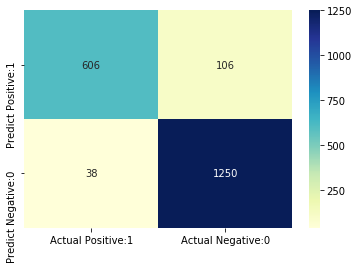

In [20]:
# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [21]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_xgb))

precision    recall  f1-score   support

      stable       0.92      0.85      0.88       712
    unstable       0.92      0.96      0.94      1288

    accuracy                           0.92      2000
   macro avg       0.92      0.90      0.91      2000
weighted avg       0.92      0.92      0.92      2000



In [30]:
from sklearn.model_selection import RandomizedSearchCV
n_estimators = [50, 100, 300, 500, 1000]

min_samples_split = [2, 3, 5, 7, 9]

min_samples_leaf = [1, 2, 4, 6, 8]

max_features = ['auto', 'sqrt', 'log2', None] 

hyperparameter_grid = {'n_estimators': n_estimators,

                       'min_samples_leaf': min_samples_leaf,

                       'min_samples_split': min_samples_split,

                       'max_features': max_features}


grid = RandomizedSearchCV(clf_extratree, hyperparameter_grid ,verbose=1,n_jobs = -1, cv=5, n_iter=10, scoring = 'accuracy', random_state = 1)
grid.fit(X_train,y_train)


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   57.8s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  1.1min finished


RandomizedSearchCV(cv=5, estimator=ExtraTreesClassifier(random_state=1),
                   n_jobs=-1,
                   param_distributions={'max_features': ['auto', 'sqrt', 'log2',
                                                         None],
                                        'min_samples_leaf': [1, 2, 4, 6, 8],
                                        'min_samples_split': [2, 3, 5, 7, 9],
                                        'n_estimators': [50, 100, 300, 500,
                                                         1000]},
                   random_state=1, scoring='accuracy', verbose=1)

In [38]:
grid.best_params_

{'n_estimators': 1000,
 'min_samples_split': 2,
 'min_samples_leaf': 8,
 'max_features': None}

In [39]:
y_pred_grid_lgb = grid.predict(norm_X_test)
print(classification_report(y_test, y_pred_grid_lgb))

precision    recall  f1-score   support

      stable       0.92      0.87      0.89       712
    unstable       0.93      0.96      0.94      1288

    accuracy                           0.93      2000
   macro avg       0.93      0.91      0.92      2000
weighted avg       0.93      0.93      0.93      2000



In [42]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_grid_lgb))

Accuracy: 0.927


Text(0, 0.5, 'Feature Importance Score')

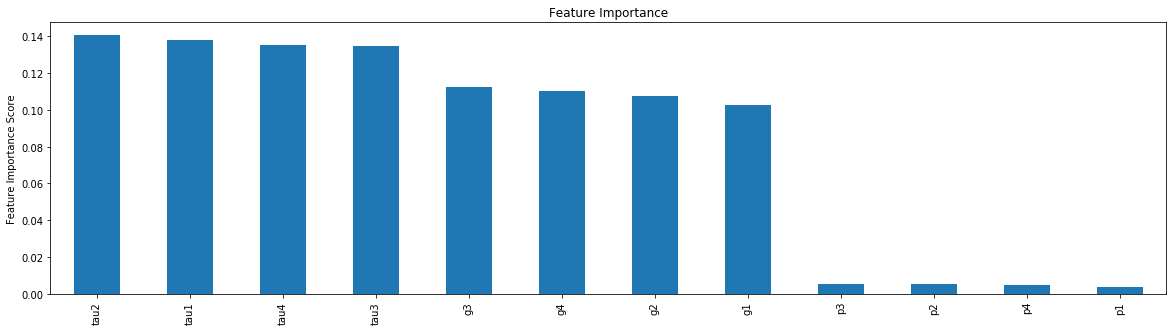

In [62]:
#Feature importance for top 50 predictors
predictors = [x for x in norm_X_train.columns]
feat_imp = pd.Series(clf_extratree.feature_importances_, predictors).sort_values(ascending=False)
feat_imp = feat_imp[0:50]
plt.rcParams['figure.figsize'] = 20, 5
feat_imp.plot(kind='bar', title='Feature Importance')
plt.ylabel('Feature Importance Score')

In [64]:
feature_importance = clf_extratree.feature_importances_ 
print(feature_importance)

feature_importance_normalized = np.std([tree.feature_importances_ for tree in 
                                        clf_extratree.estimators_], 
                                        axis = 0) 

[0.13764147 0.14046946 0.13441408 0.13522006 0.00365205 0.00541236
 0.00541321 0.00513276 0.1025715  0.10774075 0.11224735 0.11008495]


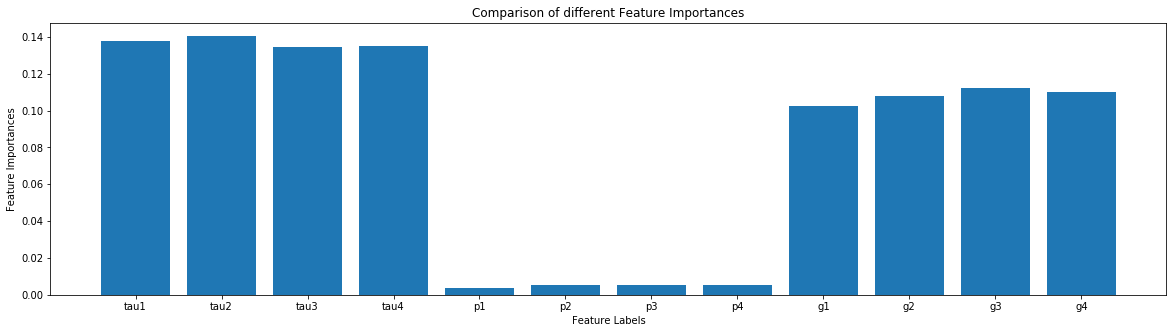

In [67]:

# Plotting a Bar Graph to compare the models 
plt.bar(norm_X_train.columns, feature_importance) 
plt.xlabel('Feature Labels') 
plt.ylabel('Feature Importances') 
plt.title('Comparison of different Feature Importances') 
plt.show() 